In [1]:
import numpy as np
import matplotlib.pyplot as plt
import datetime


In [2]:
def import_wind(filename):

    date = []
    data = []
    with open(filename) as f:
        #TODO: deal with this header, figure out how to dynamically choose array index based on the header.
        HEADER = np.array(f.readline().split(','))
    
        for dataline in f:
            if dataline != '':
                #Data from Buckley AFB came without year in datecode: add it.
                dataline = '2010-' + dataline
                dataline = dataline.split(',')
            
                time = datetime.datetime.fromisoformat((dataline[0]))
            
                dataline = list(map(float, dataline[1:]))
            
            
                data.append(dataline)
                date.append(time)
            
    

    DATA = np.array(data, dtype = float)
    DATE = np.array(date, dtype = 'datetime64' )
    return DATE, DATA, HEADER

In [3]:
DEN_DATE, DEN_DATA, DEN_HEADER = import_wind('2169715.csv')
print(DEN_DATE)

['2010-01-01T01:00:00.000000' '2010-01-01T02:00:00.000000'
 '2010-01-01T03:00:00.000000' ... '2010-12-31T21:00:00.000000'
 '2010-12-31T22:00:00.000000' '2010-12-31T23:00:00.000000']


In [4]:
GEG_DATE, GEG_DATA, GEG_HEADER = import_wind('2170510.csv')
print(GEG_DATE)

['2010-01-01T01:00:00.000000' '2010-01-01T02:00:00.000000'
 '2010-01-01T03:00:00.000000' ... '2010-12-31T21:00:00.000000'
 '2010-12-31T22:00:00.000000' '2010-12-31T23:00:00.000000']


In [5]:
print(GEG_HEADER)

['DATE' 'HLY-WIND-1STDIR' 'HLY-WIND-1STPCT' 'HLY-WIND-2NDDIR'
 'HLY-WIND-2NDPCT' 'HLY-WIND-AVGSPD' 'HLY-WIND-PCTCLM' 'HLY-WIND-VCTDIR'
 'HLY-WIND-VCTSPD\n']


Text(0, 0.5, 'HLY-WIND-AVGSPD')

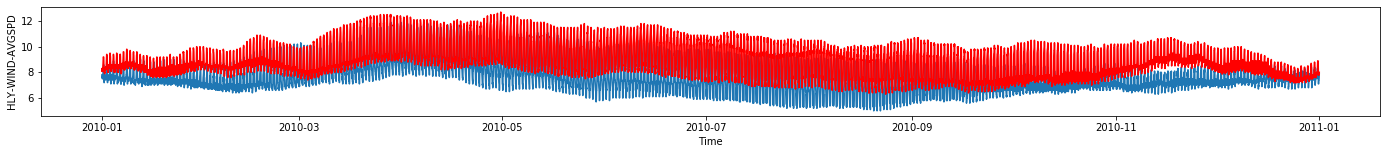

In [6]:
fig, ax = plt.subplots()
#ax.set_xlim(1,365)
fig.set_size_inches(24, 2)
ax.plot(DEN_DATE[:],DEN_DATA[:,12])
ax.plot(GEG_DATE[:],GEG_DATA[:,4],'r')
ax.set_xlabel('Time')
ax.set_ylabel(DEN_HEADER[12+1])



Text(0.5, 1.0, 'GEG')

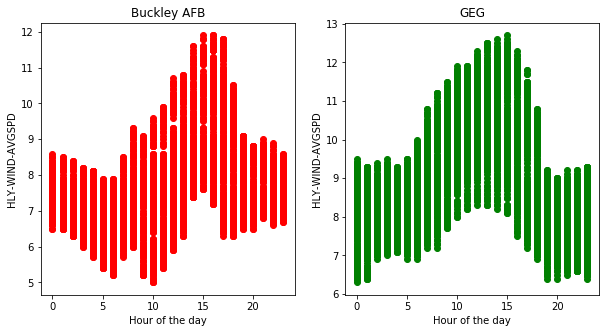

In [7]:


fig2, (ax21, ax22) = plt.subplots(1, 2)
fig2.set_size_inches(10, 5)

ax21.plot([dt.hour for dt in DEN_DATE.astype(object)],DEN_DATA[:,12], 'ro')
ax21.set_ylabel(DEN_HEADER[12+1])
ax21.set_xlabel('Hour of the day')
ax21.set_title('Buckley AFB')

ax22.plot([dt.hour for dt in GEG_DATE.astype(object)], GEG_DATA[:,4], 'go')
ax22.set_ylabel(GEG_HEADER[4+1])
ax22.set_xlabel('Hour of the day')
ax22.set_title('GEG')



Text(0.5, 1.0, 'Buckley AFB')

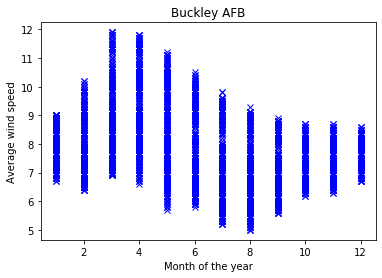

In [11]:
fig3, ax3 = plt.subplots()

ax3.plot([dt.month for dt in DEN_DATE.astype(object)],DEN_DATA[:,12], 'bx')
ax3.set_ylabel('Average wind speed')
ax3.set_xlabel('Month of the year')
ax3.set_title('Buckley AFB')

Text(0.5, 0, 'Day of the month')

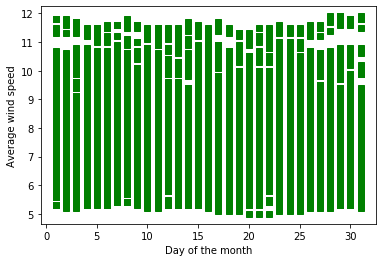

In [10]:
fig4, ax4 = plt.subplots()

ax4.plot([dt.day for dt in DEN_DATE.astype(object)],DEN_DATA[:,12], 'gs')
ax4.set_ylabel('Average wind speed')
ax4.set_xlabel('Day of the month')

There is no apparent correlation between day of the month and wind speed, if you can believe it...